In [1]:
from copy import deepcopy
import numpy as np
import matplotlib.pyplot as plt
from hyperopt import hp, tpe
from scipy.linalg import expm
from qibo import hamiltonians, set_backend, Circuit
from qibo.symbols import *
from qibo.symbols import *
import qibo
from qibo.transpiler.unitary_decompositions import two_qubit_decomposition
qibo.set_backend("numpy")
backend = qibo.backends.NumpyBackend()
np.set_printoptions(precision=3, suppress=True)

/home/marek/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "
[Qibo 0.2.19|INFO|2025-06-18 15:43:34]: Using numpy backend on /CPU:0


In [2]:
def show_shots(circuit):
    # Define the number of measurement shots
    nshots = 1000

    # Execute the circuit with the specified number of shots
    result = circuit.execute(nshots=nshots)

    # Get the measurement frequencies (counts for each bitstring)
    # The keys will be bitstrings (e.g., '000', '001'), and values will be their counts
    frequencies = result.frequencies()

    # Print the frequencies
    print(f"Measurement outcomes after {nshots} shots:")
    print("Frequencies (counts per bitstring):", frequencies)

    # --- Generate and display the histogram ---

    # Prepare data for the histogram
    # Get all possible 3-qubit states (000 to 111)
    all_states = [bin(i)[2:].zfill(circuit.nqubits) for i in range(2**circuit.nqubits)]
    counts = [frequencies.get(state, 0) for state in all_states] # Get count, 0 if state not observed

    # Create the histogram plot
    fig, ax = plt.subplots(figsize=(8, 5))
    bars = ax.bar(all_states, counts, color='skyblue')

    # Add labels and title
    ax.set_xlabel("Measurement Outcome (Bitstring)")
    ax.set_ylabel("Number of Shots")
    ax.set_title(f"Histogram of Measurement Outcomes ({nshots} Shots)")
    ax.set_ylim(bottom=0) # Ensure y-axis starts at 0

    # Add text labels on top of each bar
    for bar in bars:
        yval = bar.get_height()
        if yval > 0: # Only label bars with non-zero height
            ax.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 0), ha='center', va='bottom')

    # Show the plot
    plt.tight_layout()
    plt.show()

    # Optional: Print probabilities as well
    # probabilities = result.probabilities(binary=True)
    # print("\nProbabilities (probability per bitstring):", {bin(i)[2:].zfill(circuit.nqubits): p for i, p in enumerate(probabilities.tolist())})

First we check a simple test

[Qibo 0.2.19|INFO|2025-06-18 15:43:34]: Using numpy backend on /CPU:0
[Qibo 0.2.19|WARNING|2025-06-18 15:43:34]: Calculating the dense form of a symbolic Hamiltonian. This operation is memory inefficient.


Measurement outcomes after 1000 shots:
Frequencies (counts per bitstring): Counter({'00': 1000})


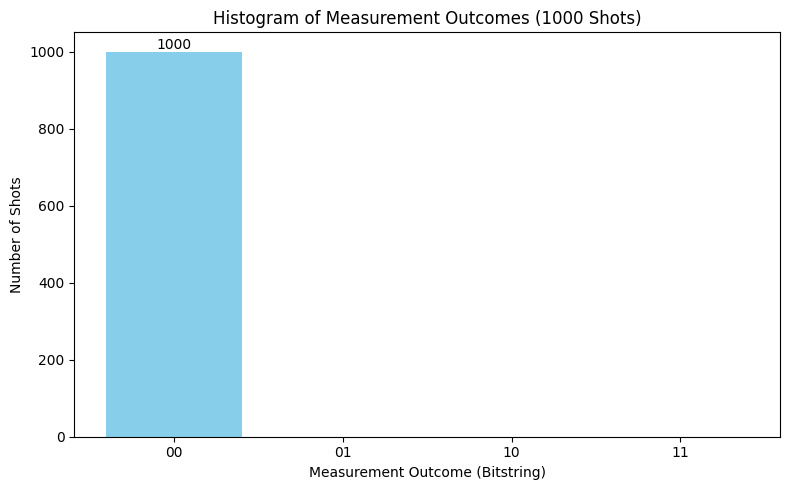

In [3]:
L = 2
H_def = sum([ X(x)*X(x+1) for x in range(L-1)])
q0 = 0
q1 = 1
set_backend("numpy")
H_sh = hamiltonians.SymbolicHamiltonian(H_def)
H = H_sh.matrix
H_sh.form
circ = H_sh.circuit(np.pi)
# Add measurement gates to all qubits at the end of the circuit
circ.add(gates.M(q0, q1))
show_shots(circ)

Measurement outcomes after 1000 shots:
Frequencies (counts per bitstring): Counter({'00': 524, '11': 476})


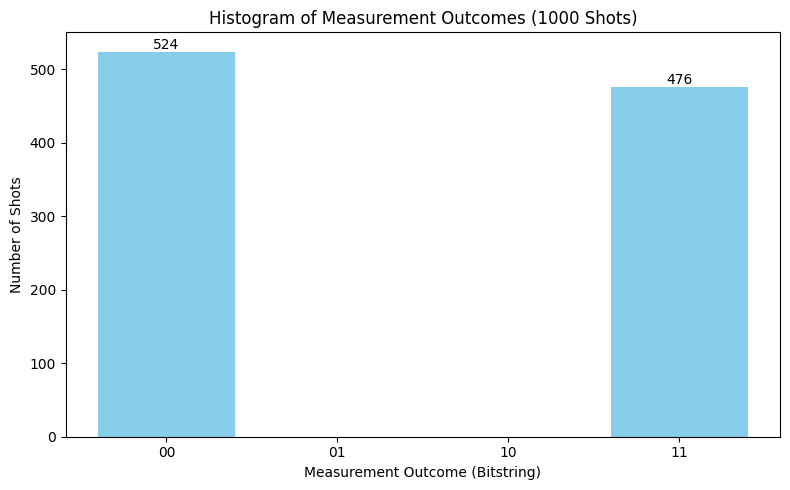

In [4]:
import numpy as np
from qibo import Circuit, gates


circuit = Circuit(2)
circuit.add(gates.H(q0))
circuit.add(gates.CNOT(q0, q1))
circuit.add(gates.M(q0, q1))

show_shots(circuit)

Measurement outcomes after 1000 shots:
Frequencies (counts per bitstring): Counter({'11': 515, '00': 485})


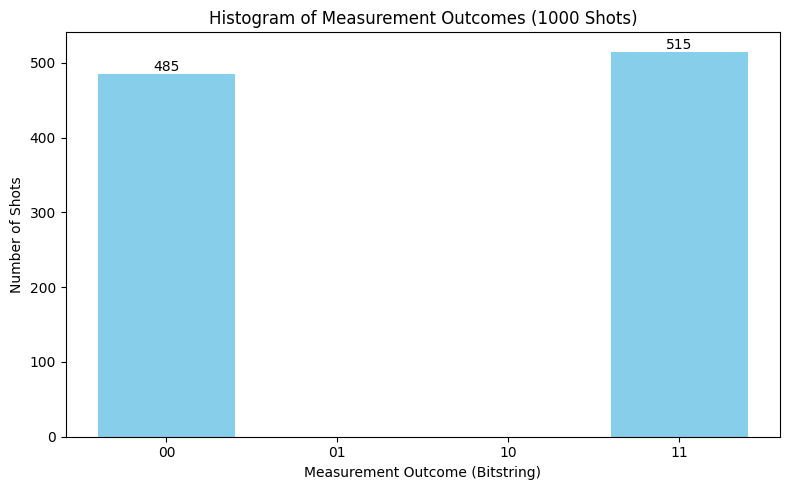

In [5]:
circuit = Circuit(2)

circuit.add(gates.CNOT(q0, q1))
circuit.add(gates.RX(q0, np.pi/2))
circuit.add(gates.CNOT(q0, q1))
circuit.add(gates.M(q0, q1))
show_shots(circuit)